### Import the Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
model = pd.read_csv('C:\\Users\\Neha\\Desktop\\New folder\\Cyber_Security\\app_data.csv')
model.head()

,req__baseUrl,req__body__note__title,req__body__note__desc,req__fresh,req__headers__host,req__headers__user-agent,req__headers__content-type,req__headers__org_id,req__headers__user_session_id,req__headers__accept,...,req__hostname,req__ip,req__originalUrl,req__path,req__protocol,req__secure,req__stale,req__subdomains__-,req__xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


### Check the shape of the dataset

In [4]:
model.shape

(1000, 23)

### Check the info of dataset

In [5]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   req__baseUrl                   1000 non-null   object
 1   req__body__note__title         1000 non-null   object
 2   req__body__note__desc          1000 non-null   object
 3   req__fresh                     1000 non-null   bool  
 4   req__headers__host             1000 non-null   object
 5   req__headers__user-agent       1000 non-null   object
 6   req__headers__content-type     1000 non-null   object
 7   req__headers__org_id           1000 non-null   object
 8   req__headers__user_session_id  1000 non-null   object
 9   req__headers__accept           1000 non-null   object
 10  req__headers__content-length   1000 non-null   int64 
 11  req__headers__user__name       1000 non-null   object
 12  req__headers__user__role       1000 non-null   object
 13  req_

### Check for missing values

In [6]:
model.isnull().sum()

req__baseUrl                     0
req__body__note__title           0
req__body__note__desc            0
req__fresh                       0
req__headers__host               0
req__headers__user-agent         0
req__headers__content-type       0
req__headers__org_id             0
req__headers__user_session_id    0
req__headers__accept             0
req__headers__content-length     0
req__headers__user__name         0
req__headers__user__role         0
req__hostname                    0
req__ip                          0
req__originalUrl                 0
req__path                        0
req__protocol                    0
req__secure                      0
req__stale                       0
req__subdomains__-               0
req__xhr                         0
isSafe                           0
dtype: int64

- There is no missing values in the dataset.

### Checking correlation inside the dataset

In [7]:
model.corr()

,req__fresh,req__headers__content-length,req__secure,req__stale,req__xhr,isSafe
req__fresh,NaN,NaN,NaN,NaN,NaN,NaN
req__headers__content-length,NaN,NaN,NaN,NaN,NaN,NaN
req__secure,NaN,NaN,NaN,NaN,NaN,NaN
req__stale,NaN,NaN,NaN,NaN,NaN,NaN
req__xhr,NaN,NaN,NaN,NaN,NaN,NaN
isSafe,NaN,NaN,NaN,NaN,NaN,1.0


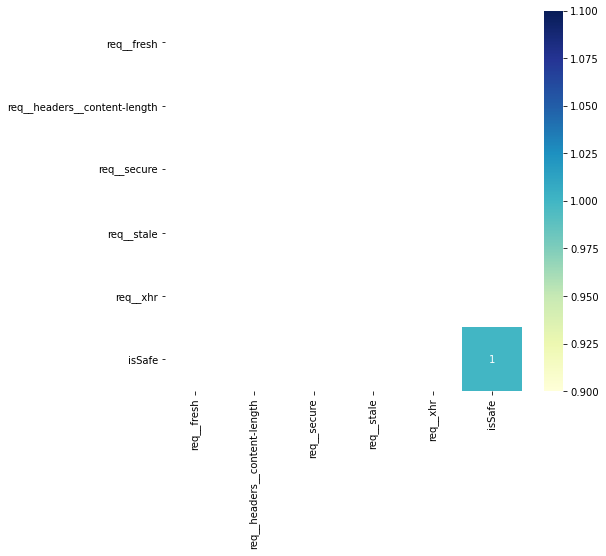

In [8]:
plt.figure(figsize = (8, 7))
sns.heatmap(model.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As we can notice there is no corelation between many feature variable and target variable
- More the % of variation more the information column have, but we observed that many column have consatant values so these column do not have much information to predict the target variable. We have to drop column which are inlistd as follow.

['req__baseUrl','req__body__note__title','req__fresh','req__headers__host','req__headers__user-agent','req__headers__user-agent', 'req__headers__content-type', 'req__headers__org_id','req__headers__user_session_id ','req__headers__accept', 'req__headers__content-length', 'req__headers__user__name', 'req__headers__user__role ','req__hostname', 'req__ip', 'req__originalUrl ','req__path ','req__protocol','req__secure ','req__stale','req__subdomains__- ', 'req__xhr']
   
 

In [9]:
# Dropping not necessary features.

model = model.drop(['req__baseUrl','req__body__note__title','req__fresh','req__headers__host','req__headers__user-agent','req__headers__user-agent', 'req__headers__content-type', 'req__headers__org_id','req__headers__user_session_id','req__headers__accept', 'req__headers__content-length', 'req__headers__user__name', 'req__headers__user__role','req__hostname', 'req__ip', 'req__originalUrl','req__path','req__protocol','req__secure','req__stale','req__subdomains__-', 'req__xhr'], axis=1)

In [10]:
print(model.head())

                               req__body__note__desc  isSafe
0  Top recognize eat. Fact whom spend area thing ...    True
1  As possible American many prepare four strong....    True
2                Tuesday Notes or 2 like 2 XSP Class   False
3  State third represent energy campaign not forg...    True
4  Us enjoy since. Time identify image position o...   False


In [11]:
model["isSafe"].value_counts()

True     572
False    428
Name: isSafe, dtype: int64

- This shows that dataset is balanced.

### Extract the independent variables to create a dataframe X

In [12]:
X = model["req__body__note__desc"]
X.head()

0    Top recognize eat. Fact whom spend area thing ...
1    As possible American many prepare four strong....
2                  Tuesday Notes or 2 like 2 XSP Class
3    State third represent energy campaign not forg...
4    Us enjoy since. Time identify image position o...
Name: req__body__note__desc, dtype: object

### Extract the dependent variables to create a dataframe y

In [13]:
y = model["isSafe"]
y.head()

0     True
1     True
2    False
3     True
4    False
Name: isSafe, dtype: bool

### Split X and y into train and test dataset with test_size = 0.20, random_state=0

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Check the shape of X, y of train and test dataset

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


### Data Preprocessing

- Our algorithm always expect the input to be integers/floats, so we need to have some data preprocessing layer in the middle to convert the words to integers/floats.
- There are couples of ways of doing this are as fallows,
     - CountVectorizer
     - TfidfVectorizer
     - Word Embedding

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  
trainCV = cv.fit_transform(X_train)
testCV = cv.transform(X_test)

### Applying various Machine Learning models

### Naïve Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(trainCV,y_train)
pred_NB = naive_bayes.predict(testCV)

In [18]:
from sklearn.metrics import accuracy_score
Accuracy_Score_NB = accuracy_score(y_test, pred_NB)
print('Accuracy score for NB is:',Accuracy_Score_NB)

Accuracy score for NB is: 0.84


In [19]:
from sklearn.metrics import confusion_matrix
matrix_knn_model1 = pd.DataFrame()
matrix_NB = pd.DataFrame(confusion_matrix(y_test, pred_NB))
matrix_NB.index = ['Actual Not Safe','Actual Safe']
matrix_NB.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for NB is\n\n',matrix_NB)
    


Confusion matrix for NB is

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  49              32
Actual Safe                       0             119


In [20]:
from sklearn.metrics import classification_report
print('Classification report for NB:\n\n',classification_report(y_test, pred_NB))

Classification report for NB:

               precision    recall  f1-score   support

       False       1.00      0.60      0.75        81
        True       0.79      1.00      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



### K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(trainCV, y_train)
pred_knn = classifier_knn.predict(testCV)

Accuracy_Score_knn = accuracy_score(y_test, pred_knn)
print('Accuracy score for KNN is:',Accuracy_Score_knn)

Accuracy score for KNN is: 0.405


In [22]:
matrix_knn = pd.DataFrame()
matrix_knn = pd.DataFrame(confusion_matrix(y_test, pred_knn))
matrix_knn.index = ['Actual Not Safe','Actual Safe']
matrix_knn.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for KNN is \n\n',matrix_knn)
    

Confusion matrix for KNN is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  81               0
Actual Safe                     119               0


In [23]:
print('Classification report for KNN is:\n\n',classification_report(y_test, pred_knn))

Classification report for KNN is:

               precision    recall  f1-score   support

       False       0.41      1.00      0.58        81
        True       0.00      0.00      0.00       119

    accuracy                           0.41       200
   macro avg       0.20      0.50      0.29       200
weighted avg       0.16      0.41      0.23       200



C:\Users\Neha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine (SVM)

### SVM_Linear

In [24]:
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(trainCV, y_train)
pred_svm_linear = classifier_svm_linear.predict(testCV)

In [25]:
Accuracy_Score_SVM_Linear = accuracy_score(y_test, pred_svm_linear)
print('Accuracy score for SVM_Linear is:',Accuracy_Score_SVM_Linear)

Accuracy score for SVM_Linear is: 0.76


In [26]:
matrix_SVM_Linear = pd.DataFrame()
matrix_SVM_Linear = pd.DataFrame(confusion_matrix(y_test, pred_svm_linear))
matrix_SVM_Linear.index = ['Actual Not Safe','Actual Safe']
matrix_SVM_Linear.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for SVM_Linear is \n\n',matrix_SVM_Linear)
    

Confusion matrix for SVM_Linear is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  53              28
Actual Safe                      20              99


In [27]:
print('Classification report for SVM_Linear is:\n\n',classification_report(y_test, pred_svm_linear))

Classification report for SVM_Linear is:

               precision    recall  f1-score   support

       False       0.73      0.65      0.69        81
        True       0.78      0.83      0.80       119

    accuracy                           0.76       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.76      0.76      0.76       200



### SVM_Gaussion

In [28]:
classifier_svm_rbf = SVC(kernel = 'rbf')
classifier_svm_rbf.fit(trainCV, y_train)
pred_svm_rbf = classifier_svm_rbf.predict(testCV)

In [29]:
Accuracy_Score_SVM_Gaussion = accuracy_score(y_test, pred_svm_rbf)
print('Accuracy score for SVM_Gussion is:',Accuracy_Score_SVM_Gaussion)

Accuracy score for SVM_Gussion is: 0.84


In [30]:
matrix_SVM_Gaussion = pd.DataFrame()
matrix_SVM_Gaussion = pd.DataFrame(confusion_matrix(y_test, pred_svm_rbf))
matrix_SVM_Gaussion.index = ['Actual Not Safe','Actual Safe']
matrix_SVM_Gaussion.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for SVM_Gaussion is \n\n',matrix_SVM_Gaussion)
    

Confusion matrix for SVM_Gaussion is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  49              32
Actual Safe                       0             119


In [31]:
print('Classification report for SVM_Gaussion is:\n\n',classification_report(y_test, pred_svm_rbf))

Classification report for SVM_Gaussion is:

               precision    recall  f1-score   support

       False       1.00      0.60      0.75        81
        True       0.79      1.00      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



### SVM_Polynomial

In [32]:
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(trainCV, y_train)
pred_svm_poly = classifier_svm_poly.predict(testCV)

In [33]:
Accuracy_Score_SVM_Polynomial = accuracy_score(y_test, pred_svm_poly)
print('Accuracy score for SVM_Polynomial is:',Accuracy_Score_SVM_Polynomial)

Accuracy score for SVM_Polynomial is: 0.79


In [34]:
matrix_SVM_Polynomial = pd.DataFrame()
matrix_SVM_Polynomial = pd.DataFrame(confusion_matrix(y_test, pred_svm_poly))
matrix_SVM_Polynomial.index = ['Actual Not Safe','Actual Safe']
matrix_SVM_Polynomial.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for SVM_Polynomial is \n\n',matrix_SVM_Polynomial)
    

Confusion matrix for SVM_Polynomial is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  39              42
Actual Safe                       0             119


In [35]:
print('Classification report for SVM_Polynomial is:\n\n',classification_report(y_test, pred_svm_poly))

Classification report for SVM_Polynomial is:

               precision    recall  f1-score   support

       False       1.00      0.48      0.65        81
        True       0.74      1.00      0.85       119

    accuracy                           0.79       200
   macro avg       0.87      0.74      0.75       200
weighted avg       0.84      0.79      0.77       200



### SVM_Sigmoid

In [51]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid')
classifier_svm_sigmoid.fit(trainCV, y_train)
pred_svm_sigmoid = classifier_svm_sigmoid.predict(testCV)

In [52]:
Accuracy_Score_SVM_Sigmoid = accuracy_score(y_test, pred_svm_sigmoid)
print('Accuracy score for SVM_Sigmoid is:',Accuracy_Score_SVM_Sigmoid)

Accuracy score for SVM_Sigmoid is: 0.835


In [53]:
matrix_SVM_Sigmoid = pd.DataFrame()
matrix_SVM_Sigmoid = pd.DataFrame(confusion_matrix(y_test, pred_svm_sigmoid))
matrix_SVM_Sigmoid.index = ['Actual Not Safe','Actual Safe']
matrix_SVM_Sigmoid.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for SVM_Sigmoid is \n\n',matrix_SVM_Sigmoid)
    

Confusion matrix for SVM_Sigmoid is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  49              32
Actual Safe                       1             118


In [54]:
print('Classification report for SVM_Sigmoid is:\n\n',classification_report(y_test, pred_svm_sigmoid))

Classification report for SVM_Sigmoid is:

               precision    recall  f1-score   support

       False       0.98      0.60      0.75        81
        True       0.79      0.99      0.88       119

    accuracy                           0.83       200
   macro avg       0.88      0.80      0.81       200
weighted avg       0.86      0.83      0.82       200



### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(trainCV, y_train)
pred_dt = classifier_dt.predict(testCV)

In [56]:
Accuracy_Score_dt = accuracy_score(y_test, pred_dt)
print('Accuracy score for Decision_Tree is:',Accuracy_Score_dt)

Accuracy score for Decision_Tree is: 0.7


In [57]:
matrix_Decision_Tree = pd.DataFrame()
matrix_Decision_Tree = pd.DataFrame(confusion_matrix(y_test, pred_dt))
matrix_Decision_Tree.index = ['Actual Not Safe','Actual Safe']
matrix_Decision_Tree.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for Decision_Tree is \n\n',matrix_Decision_Tree)
    

Confusion matrix for Decision_Tree is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  54              27
Actual Safe                      33              86


In [58]:
print('Classification report for Decision_Tree is:\n\n',classification_report(y_test, pred_dt))

Classification report for Decision_Tree is:

               precision    recall  f1-score   support

       False       0.62      0.67      0.64        81
        True       0.76      0.72      0.74       119

    accuracy                           0.70       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200



### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(trainCV, y_train)
pred_rf = classifier_rf.predict(testCV)

In [60]:
Accuracy_Score_rf = accuracy_score(y_test, pred_rf)
print('Accuracy score for Random_Forest is:',Accuracy_Score_rf)

Accuracy score for Random_Forest is: 0.84


In [61]:
matrix_Random_Forest = pd.DataFrame()
matrix_Random_Forest = pd.DataFrame(confusion_matrix(y_test, pred_rf))
matrix_Random_Forest.index = ['Actual Not Safe','Actual Safe']
matrix_Random_Forest.columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for Random_Forest is \n\n',matrix_Random_Forest)
    

Confusion matrix for Random_Forest is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  50              31
Actual Safe                       1             118


In [62]:
print('Classification report for Random_Forest is:\n\n',classification_report(y_test, pred_rf))

Classification report for Random_Forest is:

               precision    recall  f1-score   support

       False       0.98      0.62      0.76        81
        True       0.79      0.99      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(trainCV,y_train)
pred_logreg = logreg.predict(testCV)

In [68]:
Accuracy_Score_logreg = accuracy_score(y_test, pred_logreg)
print('Accuracy score for Logistic_Regression is:',Accuracy_Score_logreg)

Accuracy score for Logistic_Regression is: 0.78


In [69]:
matrix_Log_Reg = pd.DataFrame()
matrix_Log_Reg  = pd.DataFrame(confusion_matrix(y_test, pred_logreg))
matrix_Log_Reg .index = ['Actual Not Safe','Actual Safe']
matrix_Log_Reg .columns = ['Predicted Not Safe','Predicted Safe']
print('Confusion matrix for Logistic_Regression is \n\n',matrix_Log_Reg )
    

Confusion matrix for Logistic_Regression is 

                  Predicted Not Safe  Predicted Safe
Actual Not Safe                  50              31
Actual Safe                      13             106


In [70]:
print('Classification report for Logistic_Regression is:\n\n',classification_report(y_test, pred_logreg))

Classification report for Logistic_Regression is:

               precision    recall  f1-score   support

       False       0.79      0.62      0.69        81
        True       0.77      0.89      0.83       119

    accuracy                           0.78       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.78      0.78      0.77       200



### Comparison between all Machine Learning models

In [71]:
print("Naive Bayes =",Accuracy_Score_NB)
print("K-Nearest Neighbors =",Accuracy_Score_knn)
print("Support Vector Machine Linear =",Accuracy_Score_SVM_Linear)
print("Support Vector Machine Gaussion =",Accuracy_Score_SVM_Gaussion)
print("Support Vector Machine Polynomial =",Accuracy_Score_SVM_Polynomial)
print("Support Vector Machine Sigmoid =",Accuracy_Score_SVM_Sigmoid)
print("Decision Tree =",Accuracy_Score_dt)
print("Random Forest =",Accuracy_Score_rf)
print("Logistic Regression =",Accuracy_Score_logreg)

Naive Bayes = 0.84
K-Nearest Neighbors = 0.405
Support Vector Machine Linear = 0.76
Support Vector Machine Gaussion = 0.84
Support Vector Machine Polynomial = 0.79
Support Vector Machine Sigmoid = 0.835
Decision Tree = 0.7
Random Forest = 0.84
Logistic Regression = 0.78


### Conclusion:

- By comparing accuracy_score all the machine learning models we can conclude that the accuracy_score of Naive Bayes, Support Vector Machine Linear and Random Forest is more fallowed by Support Vector Machine Sigmoid.
- So we can use these Machine Learning models to identify if the request is safe or not for the app.
- These cyber security products will help to protect web and mobile applications from runtime attacks.